# What makes a game successful?

We are the online store "Streamchik" which sells computer games worldwide. We have data up to 2016 and we need to make a plan for 2017. The goal of this research is to identify the patterns that determine the success of a game. This will allow us to invest in a potentially popular product and plan advertising campaigns.

## General information about the data

First, let's familiarize ourselves with the data

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import sys
import numpy as np
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('datasets/games.csv')
except:
    print(f'Error reading the file')

In [3]:
# first 5 lines
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# stats
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


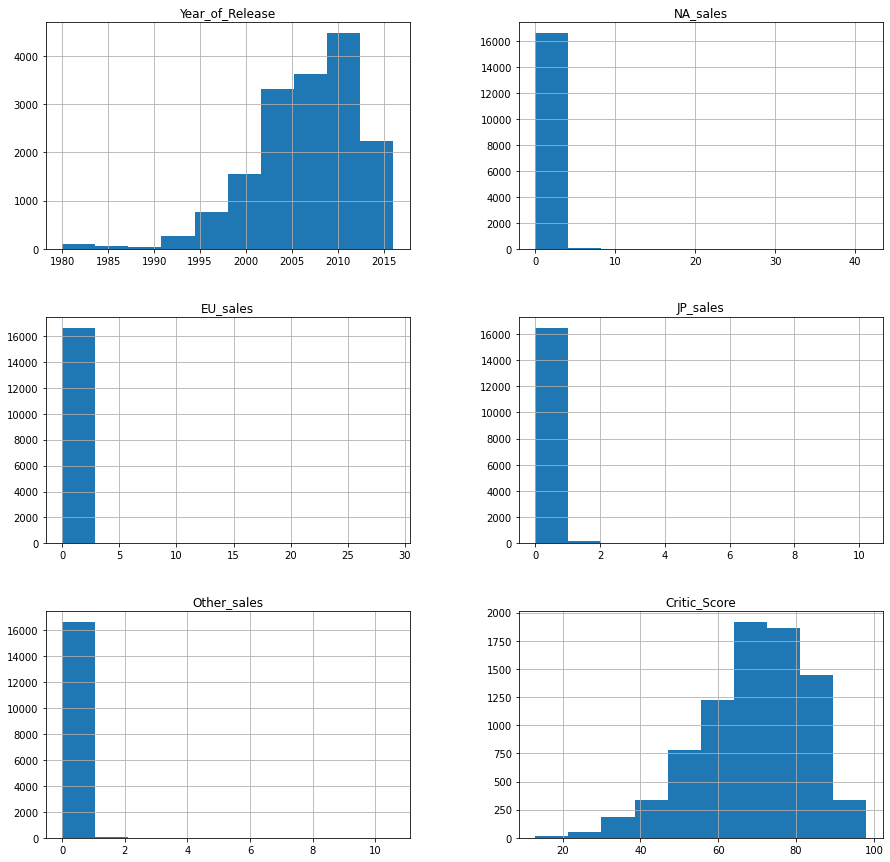

In [6]:
# histograms
df.hist(figsize=(15,15))
plt.show()

### Initial conclusions
What are our conclusions after the first acquaintance with the data?
<ol>
    <li>Missing data:
        <ul>
            <li>Name</li>
            <li>Year_of_Release</li>
            <li>Genre</li>
            <li>Critic_Score</li>
            <li>User_Score</li>
            <li>Rating</li>
        </ul>
    </li>
    <li>Anomalies:
        <ul>
            <li>User_Score - contains "tbd"</li>
        </ul>
    </li>
    <li>Data types:
        <ul>
            <li>User_Score - change to float</li>
        </ul>
    </li>
    <li>Interesting:
        <ul>
            <li>There is a wide range of years in Year_of_Release, starting from 1980. It's unlikely that 1980 will be of much help in predicting 2017.</li>
            <li>Critic_Score - the distribution is not too normal, it can be seen that the median will be not at around 50, but rather between 60 and 80.</li>
        </ul>
    </li>
    <li>Change column names to lower case</li>
</ol>

## Data preprocessing

Let's fix the inaccuracies that we previously discovered

### Column naming

In [7]:
# fix column naming
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Data types

Seeing that user_score is not a numerical field as we would like, we will immediately make two manipulations:
<ol>
    <li>Change "tbd" (stands for "to be determined") to NaN</li>
    <li>Change type to float</li>
</ol>

In [9]:
try:
    df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
    df['user_score'] = df['user_score'].astype('float')
except:
    print(f'Ошибка: {sys.exc_info()[0]}')
finally:
    print(f'user_score: {df["user_score"].dtype}')

user_score: float64


### Blanks

Now let's deal with the missing values. We will create a function for counting missing values!

In [10]:
def percent_of_isna(columns):
    good_columns = []
    data = []
    for col in columns:
        cnt = df[col].isna().sum()
        if cnt != 0: 
            mean = round(df[col].isna().mean() * 100, 2)
            data.append([col, cnt, mean])
        else:
            good_columns.append(col)
    dataframe = pd.DataFrame(data, columns=['column_name', 'count_nan', 'nan%'])
    if not dataframe.empty:
        print(dataframe)
    print(f'\n Good column(s): {good_columns}')

In [11]:
# results 
percent_of_isna(df.columns)

       column_name  count_nan   nan%
0             name          2   0.01
1  year_of_release        269   1.61
2            genre          2   0.01
3     critic_score       8578  51.32
4       user_score       9125  54.59
5           rating       6766  40.48

 Good column(s): ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']


As we can see, there are 5 columns with missing values. There are only 2 missing values for name and genre, which is 0.01% of all data. We can safely get rid of them.
<br><br>
In year_of_release, there are slightly more missing values, but they are still only 1.61%, so we will also discard them.
<br><br>
Nothing can be done with the values of critic_score and user_score. Considering that the missing values are around 50% of all data, we can simply distort the data by replacing empty values with something else. We will leave them empty.
<br><br>
But at the same time, let's take a look at rating, can we do something with them? Empty values are unlikely to be filled, but we can look and make a decision below."

In [12]:
# delete the lines with missing info in name, year_of_release, genre coumns
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [13]:
# check result
percent_of_isna(df.columns)

    column_name  count_nan   nan%
0  critic_score       8461  51.45
1    user_score       8981  54.62
2        rating       6676  40.60

 Good column(s): ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']


Now that year_of_release has no missing years, we can change the type to integer

In [14]:
# change type and check
try:
    df['year_of_release'] = df['year_of_release'].astype('int')
except:
    print(f'Error: {sys.exc_info()[0]}')
finally:
    print(f'year_of_release: {df["year_of_release"].dtype}')

year_of_release: int64


Check final result

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Now let's take a look at rating, what can we do?

In [16]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

So we see that among the filled values, we have ratings with very insignificant number of games. It is unlikely that we will sell games that are so unpopular.

In [17]:
# % of unpopular ratings
round(df.query('rating in ("EC", "K-A", "AO", "RP")')['rating'].count() * 100 / df.shape[0], 2)

0.08

Just 0.08%. Let's remove this data

In [18]:
df = df.query('rating not in ("EC", "K-A", "AO", "RP")')

We will replace the empty values in rating with "undefined". This way, we will be able to see the impact of empty ratings without changing the data.

In [19]:
df['rating'] = df['rating'].fillna('undefined')

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


Now we see that a large part of the missing values have been handled where it is possible. As a result, we got rid of less than 2% of the data, which is acceptable.

### Duplicates

Now let's try to find duplicates. Are there identical rows or are there almost identical rows (where the name of the game and the platform match)? As a general rule, one game should be on one platform only once. When a game re-releases, either the official name changes (e.g. "remastered" is added) or there will be a different release year.

In [21]:
# find all lines that have the same name and platform
value_counts = df.groupby(['name', 'platform']).size().reset_index().rename(columns={0:'count'})
value_counts = value_counts[value_counts['count'] > 1]
value_counts

,name,platform,count
7649,Madden NFL 13,PS3,2
9539,Need for Speed: Most Wanted,PC,2
9544,Need for Speed: Most Wanted,X360,2


Here we see 2 games on 3 platforms which could be duplicates

In [22]:
# let's look at them closely
df.query('name in @value_counts.name and platform in @value_counts.platform').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,undefined
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


Given the popularity of the games, we can find on the internet that:
<li>Madden NFL 13 was very popular and obviously sold more than 0 million in its native region in North America. Therefore, the row with the index 15969 can be deleted.</li>
<li>Need for Speed: Most Wanted is also a very well-known game that was released twice in 2005 and 2012 on PC and Xbox 360. We will leave these records, they are correct!</li>

In [23]:
# delete the incorrect Madden NFL 13 line
df.drop(axis=0, index=[15969], inplace=True)

In [24]:
# check
df.query('name in @value_counts.name and platform in @value_counts.platform').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,undefined
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


We will also check for obvious duplicates

In [25]:
df.duplicated().sum()

0

Check for duplicates is done

### Additional Information

For further investigation, it will be convenient to have a total sales for each game at hand. We will calculate total sales in all regions and save them in a separate column.

In [26]:
# add new column
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
# check result
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


At the end of this section, we have obtained data that has been cleaned of duplicates and empty values (such as year_of_release). The rest that we cannot affect are empty ratings and critic and user scores, which have a lot of missing values. We also added a new column with total game sales worldwide.

Now this data can be used for further analysis

## Data Analysis

Let's look closer at the data

### Do we need data for all years?

How many games were released in different years and do we need all the data for the last 35 years? Probably not. Then for how many?

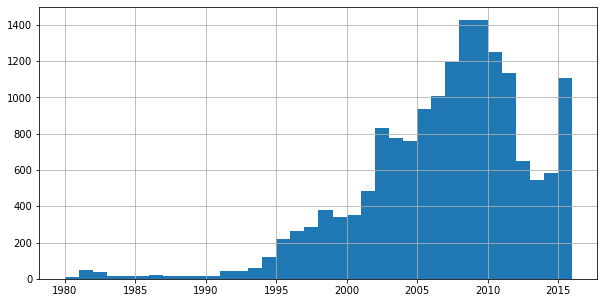

In [28]:
# let's look at the distribution of game releases 
df['year_of_release'].hist(bins=36, figsize=(10,5))
plt.show()

In conclusion, based on the data, it appears that the peak of new game releases was between the years 2000-2010, but after 2010, there has been a significant decline in new game releases. However, 2016 shows some signs of improvement, but it is unclear if it is the beginning of a new trend or just an outlier during a general decline. Since we are looking to the future in 2017 and the gaming industry is very dynamic, we will focus on the last 5 years for our analysis.

Let's create a new dataframe where we will have all the data for the last 5 years.

In [29]:
# new dataframe
five_years = df.query('year_of_release >= 2012')
five_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Platforms

How have sales changed across platforms? Let's choose the platforms with the highest total sales and plot the distribution by years. It is important for us to understand: how long the life of a platform is?

#### Potentially profitable platforms

In [30]:
# top 10 platforms of all time
top_10_platforms_all_time = (
    df.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
    .sort_values(by=(('sum', 'total_sales')), ascending=False)
    .head(10)
)
top_10_platforms_all_time

,sum
,total_sales
platform,
PS2,1233.32
X360,961.24
PS3,931.33
Wii,890.52
DS,802.13
PS,725.67
PS4,314.14
GBA,312.88


In [31]:
# top 10 platforms in the last 5 years
top_10_platforms_five_years = (
    five_years.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
    .sort_values(by=(('sum', 'total_sales')), ascending=False)
    .head(10)
)
top_10_platforms_five_years.columns = ['sum']
top_10_platforms_five_years

,sum
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


We see that some values are different, and some are completely absent. This is due to the fact that platforms sooner or later cease to be supported by the market and the manufacturer, while new platforms capture the market.

Which platforms are leading in sales? Let's choose a few potentially profitable platforms.

In [32]:
# spy = sorted platforms by year
# top platform profits by year (last 5 years)
spy = (
    five_years.query('platform in @top_10_platforms_five_years.index')
    .groupby(['platform', 'year_of_release']).agg(sales=('total_sales', 'sum'))
)
spy.head(10)

sales
platform year_of_release       
3DS      2012             51.36
         2013             56.57
         2014             43.76
         2015             27.78
         2016             15.14
DS       2012             11.01
         2013              1.54
PC       2012             23.22
         2013             12.38
         2014             13.28

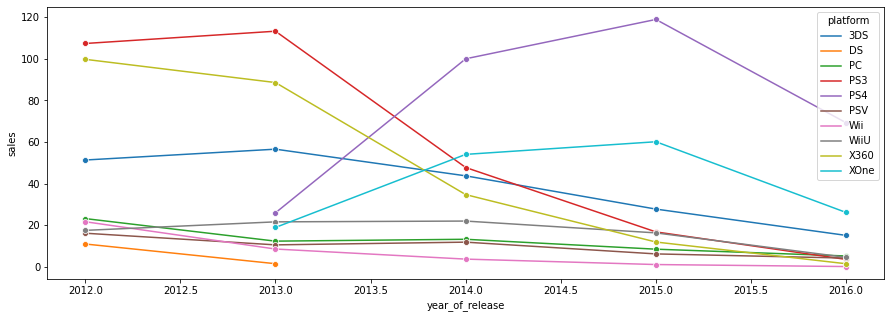

In [33]:
# distribution by years
plt.figure(figsize=(15,5))
sns.lineplot(x='year_of_release', y='sales', hue='platform', marker='o', data=spy)
plt.show()

We see that all platforms have a downward trend. This is most likely due to the smaller number of games released in the last few years. The most profitable and promising platforms so far are PS4 and Xbox One. They are one of the newest and have replaced the PS3 and Xbox 360, respectively (which, as we can see, have dipped a lot since 2013, when their newer counterparts came out). We even see that there are some similarities in graphs between competing platforms. In general, Playstation overtakes Xbox, but given the price of consoles, the average person usually has one or the other. So it's good to have both. Also for a change, we see that it makes sense to add a 3DS console (which replaced the DS). Its sales were generally lower but the downturn was not as sharp and large.

Let's look at the boxplot for total sales by platform. 

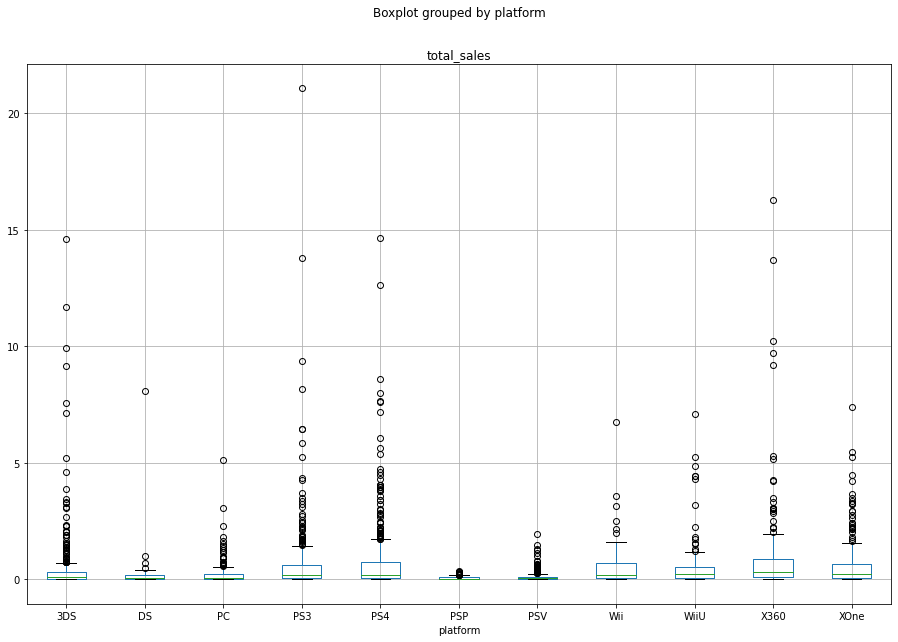

In [34]:
five_years.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.show()

We see that there are a lot of outliers (especially on more profitable platforms). Let's take a closer look at the data.

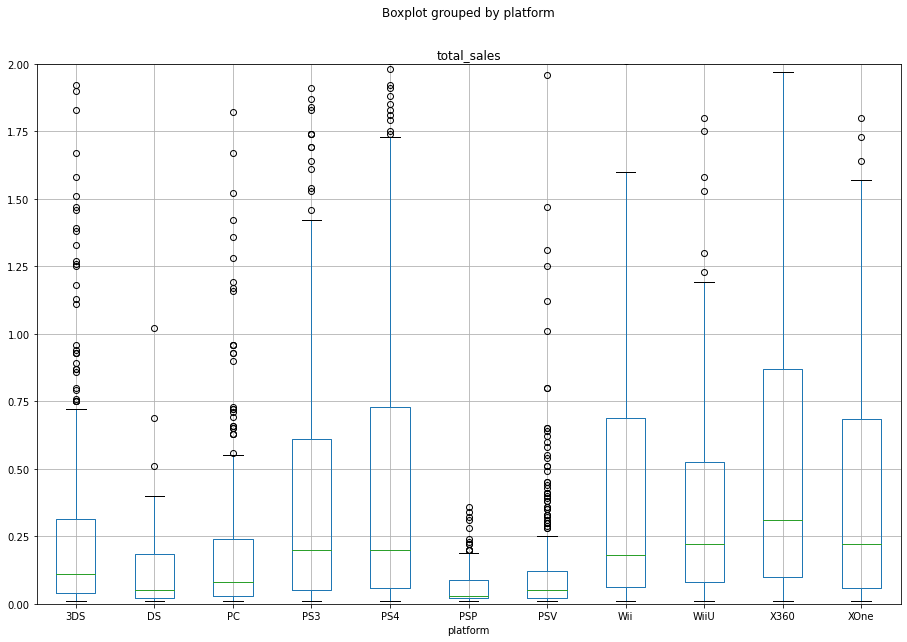

In [35]:
# limit the view to the first 2 million
five_years.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.ylim(0,2)
plt.show()

Here we see all the quartiles for each platform. As we can see, platforms that have more sales have more outliers, but in general they have good sales even without outliers. The most excellent sales have PS3, PS4, Wii, WiiU, Xbox 360, Xbox One. In general, their median sales are somewhere in the region of 0.25 million and only the Xbox360 sales are above this value!

There are so many games on the platforms that there will always be a few or even "many" that will break out into leaders in sales. There are also different price categories of games: exclusives or AAA games for PS4/Xbox One will cost much more than other games (e.g. Indie games).

#### Lifespan of platforms

In [36]:
# let's find life expectancy of platforms
lifespan_all_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
lifespan_all_time.columns = ['min', 'max']
lifespan_all_time['years'] = lifespan_all_time['max'] - lifespan_all_time['min']

In [37]:
lifespan_all_time.sort_values(by='max', ascending=False).head(10)

,min,max,years
platform,,,
XOne,2013,2016,3
3DS,2011,2016,5
X360,2005,2016,11
WiiU,2012,2016,4
Wii,2006,2016,10
PSV,2011,2016,5
PC,1985,2016,31
PS4,2013,2016,3
PS3,2006,2016,10


In [38]:
# only our top 10 platforms in the last 5 years
lifespan_only_top = lifespan_all_time.query('platform in @top_10_platforms_five_years.index')
lifespan_only_top.sort_values(by='max', ascending=False)

,min,max,years
platform,,,
3DS,2011,2016,5
PC,1985,2016,31
PS3,2006,2016,10
PS4,2013,2016,3
PSV,2011,2016,5
Wii,2006,2016,10
WiiU,2012,2016,4
X360,2005,2016,11
XOne,2013,2016,3


In [39]:
# median lifespan of top platforms
lifespan_only_top['years'].median()

7.5

In [40]:
# median lifespan of all platforms
lifespan_all_time['years'].median()

6.0

In the end, we see that the lifespan of platforms is somewhere around 6-8 years. With this we confirm that it is advisable to take data for the last 5 years, since our platforms at most will be at the end of their lifespan in 2017.

We can also immediately exclude the DS platform since the last DS game was released in 2013.

In [41]:
# remove DS
top_10_platforms_five_years.drop(axis=0, index=['DS'], inplace=True)

This is our top platforms

In [42]:
top_10_platforms_five_years

,sum
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


### Reviews

Let's see how the reviews of users and critics affect sales within a popular platform.

First, let's look at the median and amount of data for the top platforms over five years:

In [43]:
(
    five_years
    .query('platform in @top_10_platforms_five_years.index')
    .pivot_table(index='platform', 
                 values=['critic_score', 'user_score', 'total_sales'], 
                 aggfunc=['median', 'count'])
)

median                               count              \
         critic_score total_sales user_score critic_score total_sales   
platform                                                                
3DS              71.0        0.11       7.40          104         396   
PC               77.5        0.08       6.80          198         250   
PS3              74.0        0.20       7.00          213         492   
PS4              73.0        0.20       7.00          252         392   
PSV              72.0        0.05       7.75          107         411   
Wii              74.0        0.18       6.80            5          54   
WiiU             73.5        0.22       7.10           90         147   
X360             74.0        0.31       6.50          171         292   
XOne             76.0        0.22       6.80          169         247   

                     
         user_score  
platform             
3DS             114  
PC              206  
PS3             282  
PS4             257  
PSV             130  
Wii              17  
WiiU            100  
X360            235  
XOne            182

Let's make a scatterplot and calculate the correlation between reviews and sales:

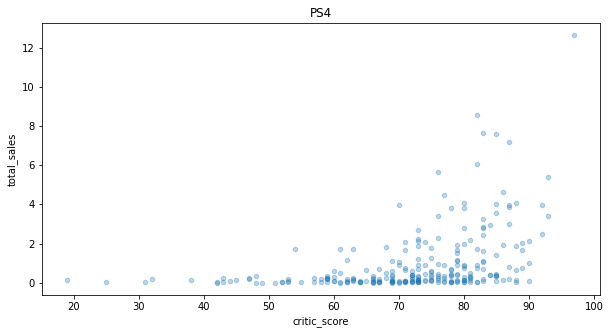

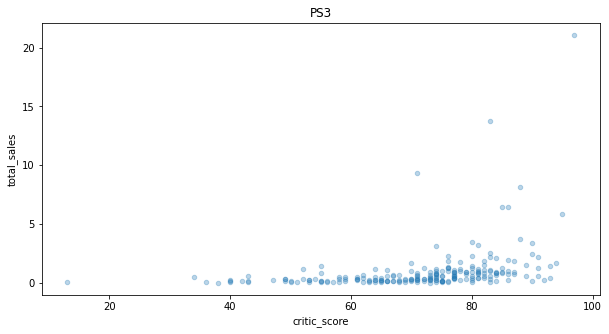

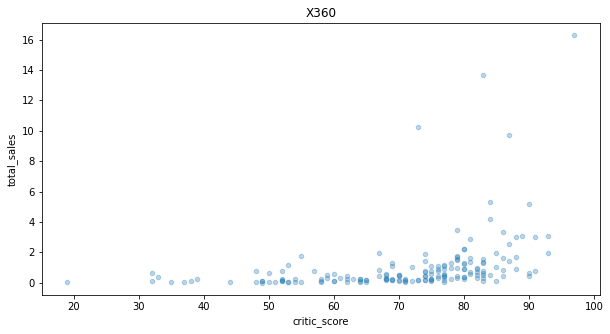

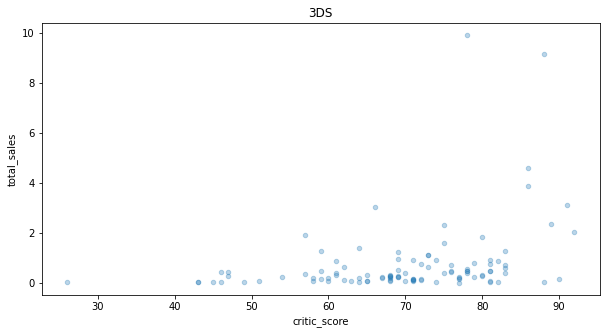

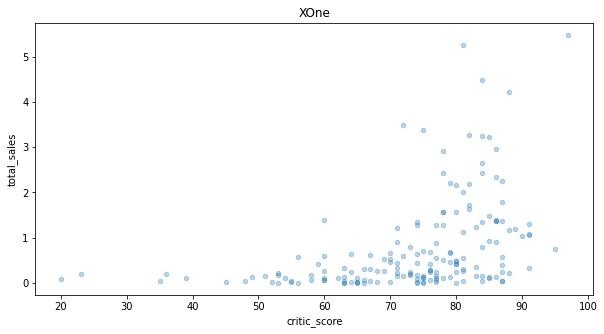

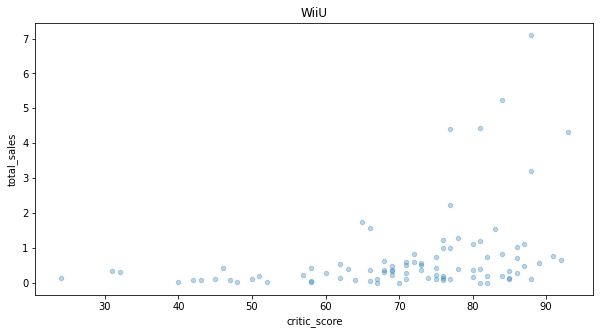

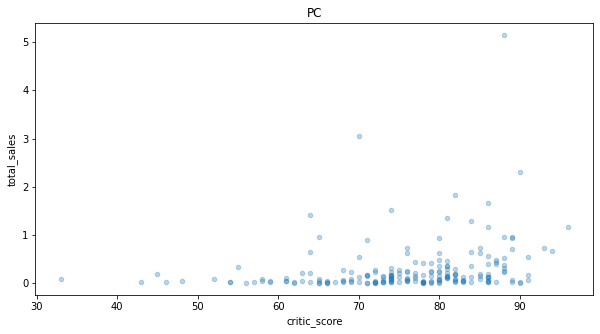

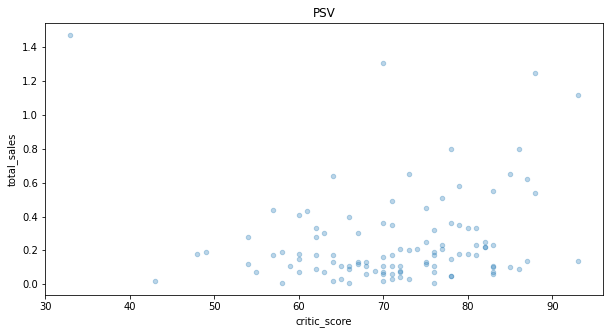

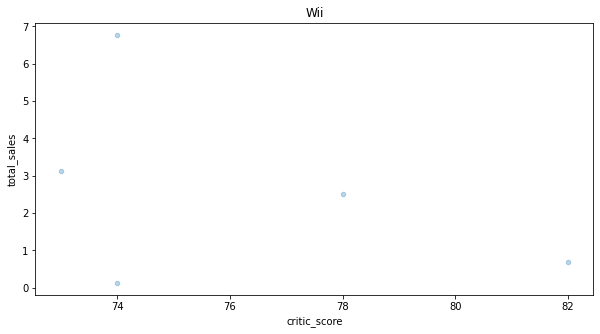

In [44]:
for platform in top_10_platforms_five_years.index:
    five_years.query('platform == @platform').plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3, figsize=(10,5))
    plt.title(platform)
    plt.show()

Some platforms appear to have sales spikes when critical reviews are high. Is there a correlation?

In [45]:
# general correlaion
round(five_years['total_sales'].corr(five_years['critic_score']), 4)

0.3086

Not much in general, let's find correlations for each platform

In [46]:
# a function that will find the correlation for each platform and the passed parameter (a score)
def find_correlation_per_platform(score):
    correlation = []
    for platform in top_10_platforms_five_years.index:
        total_sales = five_years.loc[five_years['platform'] == platform,'total_sales']
        meta_score = five_years.loc[five_years['platform'] == platform, score]
        corr = round(total_sales.corr(meta_score), 4)
        correlation.append([platform, corr])
    corr_df = pd.DataFrame(correlation, columns=['platform', 'corr'])
    return corr_df

In [47]:
# critic score correlation
critic_correlation = find_correlation_per_platform('critic_score')
critic_correlation.sort_values(by='corr', ascending=False)

,platform,corr
4,XOne,0.4170
0,PS4,0.4066
2,X360,0.3606
5,WiiU,0.3484
1,PS3,0.3342
3,3DS,0.3208
6,PC,0.2372
7,PSV,0.0945
8,Wii,-0.4243


We see that overall, that for individual values, the correlation is weak (no value exceeds 0.5). Critics often rate a game that hasn't been released yet (which means it may still be in development with bugs), and may also be interested in giving a game a certain rating to continue getting exclusive access to games in advance. It's a tricky business.

What about user scores?

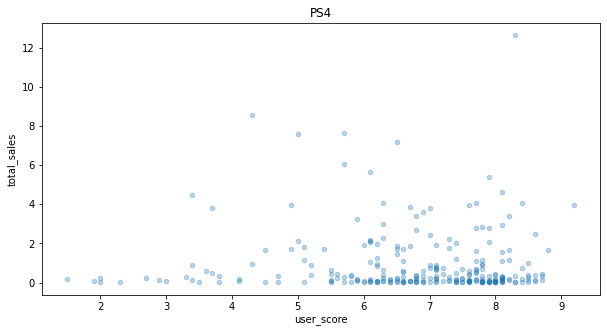

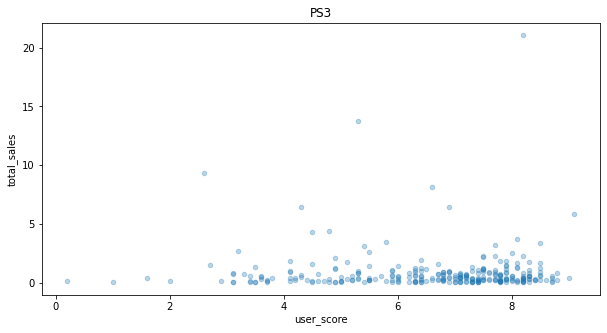

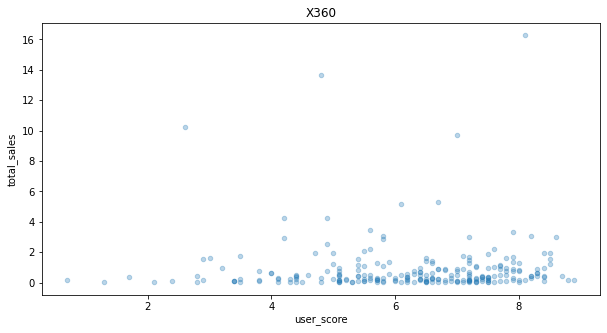

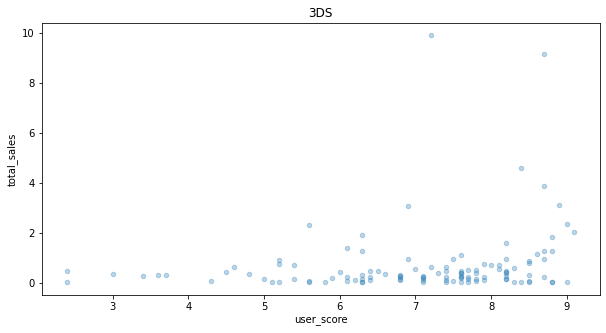

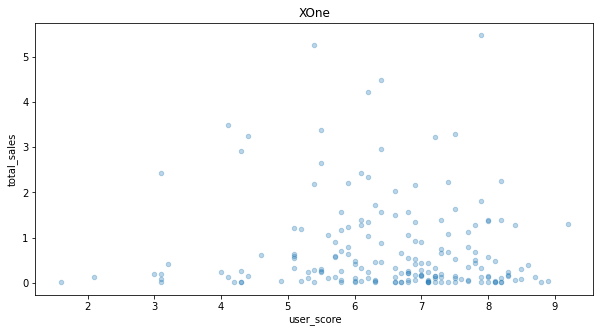

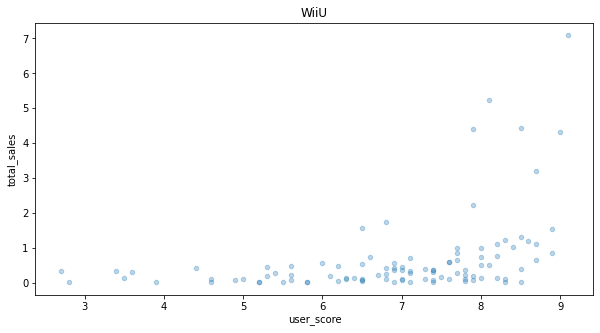

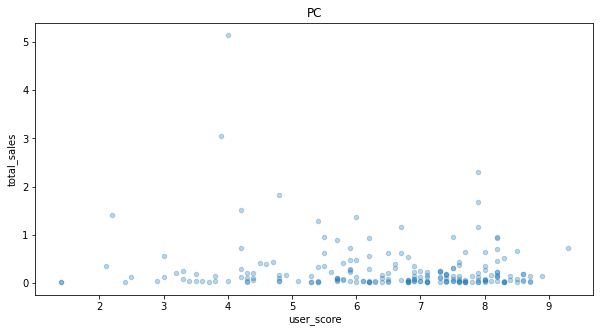

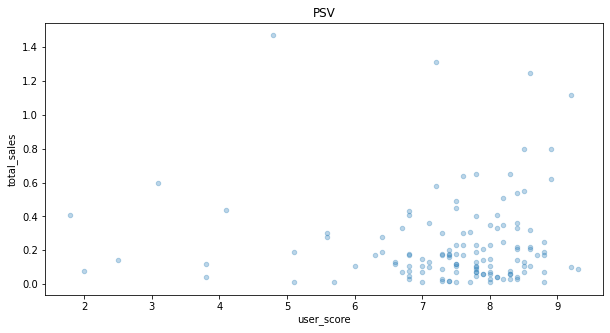

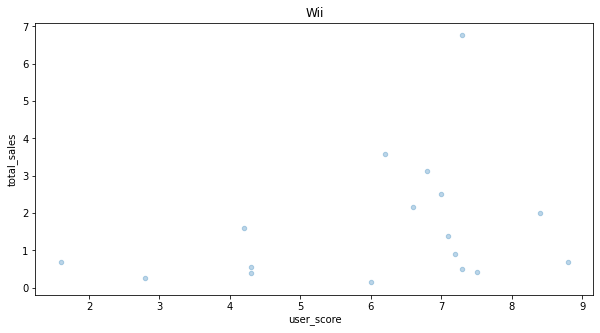

In [48]:
for platform in top_10_platforms_five_years.index:
    five_years.query('platform == @platform').plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3, figsize=(10,5))
    plt.title(platform)
    plt.show()

We see more dispersion from the bottom along all user ratings, as if the rating of others does not affect sales. Will the numbers support this theory?

In [49]:
# general correlation
round(five_years['total_sales'].corr(five_years['user_score']), 2)

0.0

Correlation is so low that it's almost zero. 

In [50]:
# correlation by platform
user_correlation = find_correlation_per_platform('user_score')
user_correlation.sort_values(by='corr', ascending=False)

,platform,corr
5,WiiU,0.4002
8,Wii,0.2962
3,3DS,0.1976
2,X360,0.0062
7,PSV,-0.0043
1,PS3,-0.0062
0,PS4,-0.0320
4,XOne,-0.0689
6,PC,-0.1219


The ratings of other users generally do not have much influence on the purchase. We see the biggest correlation in WiiU and that one is still weak. As for the critic scores, perhaps it's because most of them usually have early access to the game and therefore some potential buyers may base their decision on that.

### Genres

Let's look at the distribution of games by genre. What can we learn about the most profitable genres? Do genres with high and low sales stand out?

In [51]:
five_years.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median'])

,sum,count,mean,median
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Action,441.12,1031,0.427856,0.120
Adventure,29.43,302,0.097450,0.030
Fighting,44.49,109,0.408165,0.130
Misc,85.04,192,0.442917,0.120
Platform,61.00,85,0.717647,0.210
Puzzle,4.89,28,0.174643,0.045
Racing,53.50,115,0.465217,0.140
Role-Playing,192.80,370,0.521081,0.140


We see that the top selling games in terms of quantity and profit are in Action genre. Next up is Shooter, Role-Playing, and Sports. The most unpopular genre in terms of quantity is Puzzle, Strategy, and Adventure.
<br><br>
Overall high sales of Action genre with a rather low sales median (sales per game) can be explained by rather high number of released games.
<br><br>
As we can see Shooter, Sports and Platform have the best median sales. Considering that Shooter and Sports have a good number of games (235 and 267), it's not as many as in Action, which has a median sales of just 0.120.

## Users in different regions

Let's look at how users differ in each regions.

### Most popular platforms (top-5)

Let's find the top 5 platforms for the last 5 years for each region

In [52]:
# a function that will give us the top 5 by the passed parameter in the context of the region (based on sales)
def find_top_five(column):
    compare = pd.DataFrame()
    
    compare_na = (
        five_years.pivot_table(index=column, values='na_sales', aggfunc=['sum'])
        .sort_values(by=('sum', 'na_sales'), ascending=False)
        .head()
    )
    compare_na.columns = ['sum']
    compare_eu = (
        five_years.pivot_table(index=column, values='eu_sales', aggfunc=['sum'])
        .sort_values(by=('sum', 'eu_sales'), ascending=False)
        .head()
    )
    compare_eu.columns = ['sum']
    compare_jp = (
        five_years.pivot_table(index=column, values='jp_sales', aggfunc=['sum'])
        .sort_values(by=('sum', 'jp_sales'), ascending=False)
        .head()
    )
    compare_jp.columns = ['sum']
    
    compare['na_platform'] = compare_na.index
    compare['na_sales'] = compare_na['sum'].reset_index(drop=True)
    compare['eu_platform'] = compare_eu.index
    compare['eu_sales'] = compare_eu['sum'].reset_index(drop=True)
    compare['jp_platform'] = compare_jp.index
    compare['jp_sales'] = compare_jp['sum'].reset_index(drop=True)
    
    return compare

In [53]:
compare_platform = find_top_five('platform')
compare_platform.head()

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,140.05,PS4,141.09,3DS,87.79
1,PS4,108.74,PS3,106.85,PS3,35.29
2,PS3,103.38,X360,74.52,PSV,21.04
3,XOne,93.12,XOne,51.59,PS4,15.96
4,3DS,55.31,3DS,42.64,WiiU,13.01


In Japan the platforms of Japanese companies are in the lead, there is nothing surprising here. Europe and North America have more similar tastes, with the PS3, PS4, and X360 being the top three consoles.

### Most popular genres (top-5)

In [54]:
compare_genre = find_top_five('genre')
compare_genre.head()

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,Action,177.84,Action,159.34,Role-Playing,65.44
1,Shooter,144.77,Shooter,113.47,Action,52.80
2,Sports,81.53,Sports,69.08,Misc,12.86
3,Role-Playing,64.00,Role-Playing,48.53,Simulation,10.41
4,Misc,38.19,Racing,27.29,Fighting,9.44


Japan stands out, again. Their most popular genre is Role-Playing and the second is Action.
<br><br>
Europe and NA are almost the same, but it's worth noting that despite everything, the amount of sales in each category in America is higher. It's worth remembering!

### Does the ESRB rating affect sales in a particular region?

In [55]:
compare_rating = find_top_five('rating')
compare_rating.head()

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,M,231.57,M,193.96,undefined,108.84
1,E,114.37,E,113.02,E,28.33
2,undefined,103.31,undefined,91.50,T,26.02
3,E10+,75.70,E10+,55.37,M,21.20
4,T,66.02,T,52.96,E10+,8.19


Here we see that the most popular rating in Europe and NA is M. We can then assume that one of the target audiences there is an adult. In second place is E. Moreover, we see that in NA the M rating exceeds the E rating by more than 100 million, while in Europe the difference is less - only 80 million.
<br><br>
In Japan, the M rating is much less popular, games for a wider audience with an E and T rating are more in demand and in general the ratings are more equal among themselves (the difference between E and T is 2 million, and M is 5-7 million lower).
<br><br>
We also see "undefined" ranked third in NA and Europe, and in Japan it's number one by a huge margin over number two E (by as much as 80 million).

Let's look at sales in the regions separately. It appears or is North America very fond of buying games?

In [56]:
five_years['na_sales'].sum()

590.97

In [57]:
five_years['eu_sales'].sum()

506.81000000000006

In [58]:
five_years['jp_sales'].sum()

192.58

It's correct. North America is very attractive market indeed.

In general, in this section, we see that Europeans and Americans are largely similar in their tastes in games, and Japan is a separate world with its own rules. The most profitable among Americans and Europeans are M and E ratings, while in Japan the most popular rating is unknown to us.
<br><br>
To answer our question, in Europe and North America, the rating has a significant impact on sales, but not in Japan in general.

## Hypothesis

### The average user ratings of the Xbox One and PC platforms are the same

H_0 = The average user ratings of the Xbox One and PC platforms are the same
<br>
H_1 = The average user ratings of the Xbox One and PC platforms are different

In [69]:
user_score_xone = five_years[(~five_years['user_score'].isna()) & (five_years['platform'] == 'XOne')]['user_score']
user_score_pc = five_years[(~five_years['user_score'].isna()) & (five_years['platform'] == 'PC')]['user_score']

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

alpha = .05

# display p-value 
if results.pvalue < alpha:
    print(results.pvalue)
    print('Reject the null hypothesis')
else:
    print(results.pvalue)
    print('Could not reject the null hypothesis')

0.5489537965134912
Could not reject the null hypothesis


We may see that the opinions of users on Xbox One and PC may not differ so much.

### Average user ratings for the Action and Sports genres are different

H_0 = Average user ratings for the Action and Sports genres are the same
<br>
H_1 = Average user ratings for the Action and Sports genres are different

In [70]:
user_score_action = five_years[(~five_years['user_score'].isna()) & (five_years['genre'] == 'Action')]['user_score']
user_score_sports = five_years[(~five_years['user_score'].isna()) & (five_years['genre'] == 'Sports')]['user_score']

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

alpha = .05

# display p-value 
if results.pvalue < alpha:
    print(results.pvalue)
    print('Reject the null hypothesis')
else:
    print(results.pvalue)
    print('Could not reject the null hypothesis')

5.98945806646755e-20
Reject the null hypothesis


## Conclusion

The purpose of our research was to understand which games should we choose and plan advertising campaigns accordingly.
<br><br>
After we cleaned the data from empty values, we analyzed the most relevant values for our task.
<br><br>
In the beginning, we decided that we would only look at data from 2012 (last 5 years) as we saw that after 2011 global game sales fell (almost by half) and because the average duration of platforms is approximately 6- 7 years.
<br><br>
Next, we determined which platforms are the most profitable: PS4, PS3, Xbox 360, 3DS. Sales of each console were above 194 million.
<br><br>
We also found that the opinion of critics or other users has little effect on game sales. Critics have more weight, but it is generally not decisive.
<br><br>
Throughout this study, we observed that the tastes of Japanese buyers are significantly different from those of Europeans and Americans. While the two largest markets - Europe and North America are very similar to each other.
<br><br>
While a lot of games come out in the Action genre, the most stable profits are seen in Shooter and Sports genres.
<br><br>
For Europe and North America:
<li>Platforms: PS3, PS4, Xbox360, Xbox One</li>
<li>Genres: Shooter, Sports, Action</li>
<li>Ratings: M, E</li>
<br>
For Japan:
<li>Platforms: 3DS, PS3, PSV, PSP</li>
<li>Genres: Role-Playing, Action, Fighting, Platform</li>
<li>Ratings: особых предпочтений не выявлено</li>